In [ ]:
import random
import numpy as np
import pandas as pd


d=[1,2,3,4,5,6,7,8,'Fitness'] #denominations
N=500  #total amount
size=10 #population size

#population generation
population=[]
for i in range(size):
    c=[]
    for j in range (len(d)):
        c.append(random.randint(0,N)) #random nummer an coins von jeder deonmination
    population.append(c) #population ist jetzt eine matrix jede row is eine lösung

population=pd.DataFrame(population,columns=d)
population=population.astype({'Fitness':float})  #FITNESS IST NOCH NICHT FITNESS

print(population)

In [ ]:
#erstes mal fitness bestimmen
for i in range(size): #jede row
    fitness=0
    for j in range(len(d)-1):       #jede column außer fitness
        fitness+=population[j+1][i]*d[j]  #zahl der münzen mal denomination für die ganze reihe
                                            #TODO DAS d[j]  PASST NICHT MEHR MIT ANDEREN DENOMINATIONS

    fitness=abs(fitness-N)     # fitness ist der unterschied zwischen betrag und echter lösung 
    population['Fitness'][i]=1/(1+float(fitness)) #fitness ist 1/(diff zu N) maybe *(1/number of coins)
#print(population)
pop=population.copy()
pop['Fitness']=round(pop['Fitness'],4 )
print(pop)

In [ ]:

#genetic algorithm
cnt=1
while(True):
    for i in range(size): # for each member of population
        fitness=0
        for j in range(len(d)-1):
            fitness+=population[j+1][i]*d[j]

        fitness=abs(fitness-N)
        population['Fitness'][i]=1/(1+float(fitness))

    population=population.sort_values(by=['Fitness'])
  
    parents=population[-6:].reset_index()
    offspring=population[:3].reset_index()#the first 3 have to lowest fitness and will be mutated

  #crossover
    for i in range(3):
        r=random.randint(0,len(d)-1)
        for j in range(len(d)-1):
            if(j<r):                                 #coins with HIGHER values have a higher chanche of mutating 
                offspring[j+1][i]=parents[j+1][i]
            else:
                offspring[j+1][i]=parents[j+1][6-i-1] #offspring kriegt anzahl der münzen von parent
  
  #mutation
    mutation_p=0.75 #mutation probability
    for i in range(3):
        for j in range(len(d)-1):
            p=random.random()
            if(p>mutation_p):
                offspring[j+1][i]=random.randint(0,N)
    population=population[3:]
    population=population.append(offspring, ignore_index=True) #die ersten 3 removen und mit dem offsprimg auswecheseln
    population=population.drop(['index'],axis=1)

    """
    pop=population.copy().sort_values(by=['Fitness']).reset_index()
    pop['Fitness']=round(pop['Fitness'],4)
    pop=pop.drop(['index'],axis=1)
    """


    if(max(population['Fitness'])==1):
        break

    if(cnt%100==0):
        print(max(population['Fitness']))
    cnt+=1


In [ ]:
population=population.sort_values(by=['Fitness']).reset_index()
print(population)
print("\n-------------\n")
population=population[-1:]
print(population)

In [1]:
#pip install geneticalgorithm
import numpy as np
from geneticalgorithm import geneticalgorithm as ga

 The best solution found:                                                                           
 [100. 225.  23.  68. 150.  96. 106.]

 Objective function:
 0.0


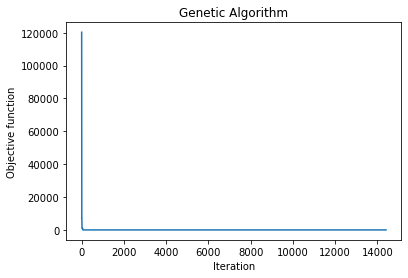

In [31]:
d=np.array([3,5,7,11,13,22,34])
N = 10000
def f_to_min(x):
    return abs(N-(x*d).sum())*(x.sum())

a = np.zeros(len(d))                    #lower boundary
#b = np.array((N/d)//1).astype('int')    #upper boundary
b = [N//d[-1]]*len(d)
varbound = np.array([a,b]).T

algorithm_param = {'max_num_iteration': None,\
                   'population_size':100,\
                   'mutation_probability':0.4,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}



model=ga(function=f_to_min,dimension=len(d),variable_type='int',variable_boundaries=varbound)
model.run()

array([[ 0., 50.],
       [ 0., 16.],
       [ 0., 10.],
       [ 0.,  7.],
       [ 0.,  5.]])